<h1 style=color:violet;>Heart stroke prediction<h1>
<h2 style=color:violet;>project given in college</h2>

<h1 style=color:blue;>##Data cleaning<h1>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [3]:
df=pd.read_csv("train_strokes.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
df.groupby('stroke')['stroke'].agg('count')

stroke
0    42617
1      783
Name: stroke, dtype: int64

In [5]:
df['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [6]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [7]:
df.smoking_status.fillna('not Known',inplace=True)


C:\Users\Bharath vellanki\AppData\Local\Temp\ipykernel_14212\1391594731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.smoking_status.fillna('not Known',inplace=True)


In [8]:
df.bmi=df.bmi.fillna(df.bmi.median())
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,not Known,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,not Known,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,not Known,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df1=df.drop(['id','ever_married','work_type','Residence_type'],axis='columns')
df1

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,95.12,18.0,not Known,0
1,Male,58.0,1,0,87.96,39.2,never smoked,0
2,Female,8.0,0,0,110.89,17.6,not Known,0
3,Female,70.0,0,0,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,161.28,19.1,not Known,0
...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,99.16,33.2,never smoked,0


<h1 style=color:violet>##Featue engineering</h1>

In [11]:
df2=df1.copy()
df2

NameError: name 'df2' is not defined

In [ ]:
df2.smoking_status.unique()

array(['not Known', 'never smoked', 'formerly smoked', 'smokes'],
      dtype=object)

In [ ]:
len(df2 .smoking_status.unique())

4

In [ ]:
df3.smoking_status=df3.smoking_status.apply(lambda x:x.strip())
df3

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,95.12,18.0,not Known,0
1,Male,58.0,1,0,87.96,39.2,never smoked,0
2,Female,8.0,0,0,110.89,17.6,not Known,0
3,Female,70.0,0,0,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,161.28,19.1,not Known,0
...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,99.16,33.2,never smoked,0


In [ ]:
df3.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df3.groupby('gender')['gender'].agg('count')

gender
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [ ]:
smoking_status=df3.groupby('smoking_status')['smoking_status'].agg('count').sort_values(ascending=False)
smoking_status

smoking_status
never smoked       16053
not Known          13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

<h1 style=color:violet>##Oulier Removal</h1>

The average avg_glucose_level of a human being is 70 to 100 Miligrams after eating it would be 140 

In [ ]:
df3[df3['avg_glucose_level']>250]

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
139,Male,70.0,1,0,251.60,27.1,never smoked,0
516,Female,64.0,0,0,250.20,27.4,not Known,0
546,Female,69.0,0,1,254.60,21.7,not Known,0
835,Male,67.0,1,1,254.63,31.0,never smoked,0
881,Female,66.0,0,0,251.46,35.2,smokes,0
...,...,...,...,...,...,...,...,...
43144,Male,68.0,1,1,260.41,39.1,formerly smoked,0
43175,Male,47.0,0,0,250.28,26.8,smokes,0
43188,Male,72.0,0,0,252.51,54.7,formerly smoked,0
43228,Male,41.0,1,0,271.01,25.8,not Known,0


Global Average BMI:
World Health Organization (WHO) data: The global average BMI for adults aged 18 and over is typically around 24 to 25.
The BMI above 60  will be very dangerous the person Alive rate is less


In [ ]:
df3[(df3['bmi'] > 60) & (df3['stroke'] > 0)]

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df3=df3.drop(df3[df3['bmi'] > 60].index)
df3


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,95.12,18.0,not Known,0
1,Male,58.0,1,0,87.96,39.2,never smoked,0
2,Female,8.0,0,0,110.89,17.6,not Known,0
3,Female,70.0,0,0,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,161.28,19.1,not Known,0
...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,99.16,33.2,never smoked,0


In [ ]:
df3[df3['bmi'] > 60]

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df3.age.describe()

count    43311.000000
mean        42.213863
std         22.533891
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [ ]:
df3.hypertension.describe()

count    43311.000000
mean         0.093256
std          0.290794
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hypertension, dtype: float64

<h1 style=color:violet;>##Data visualization</h1>


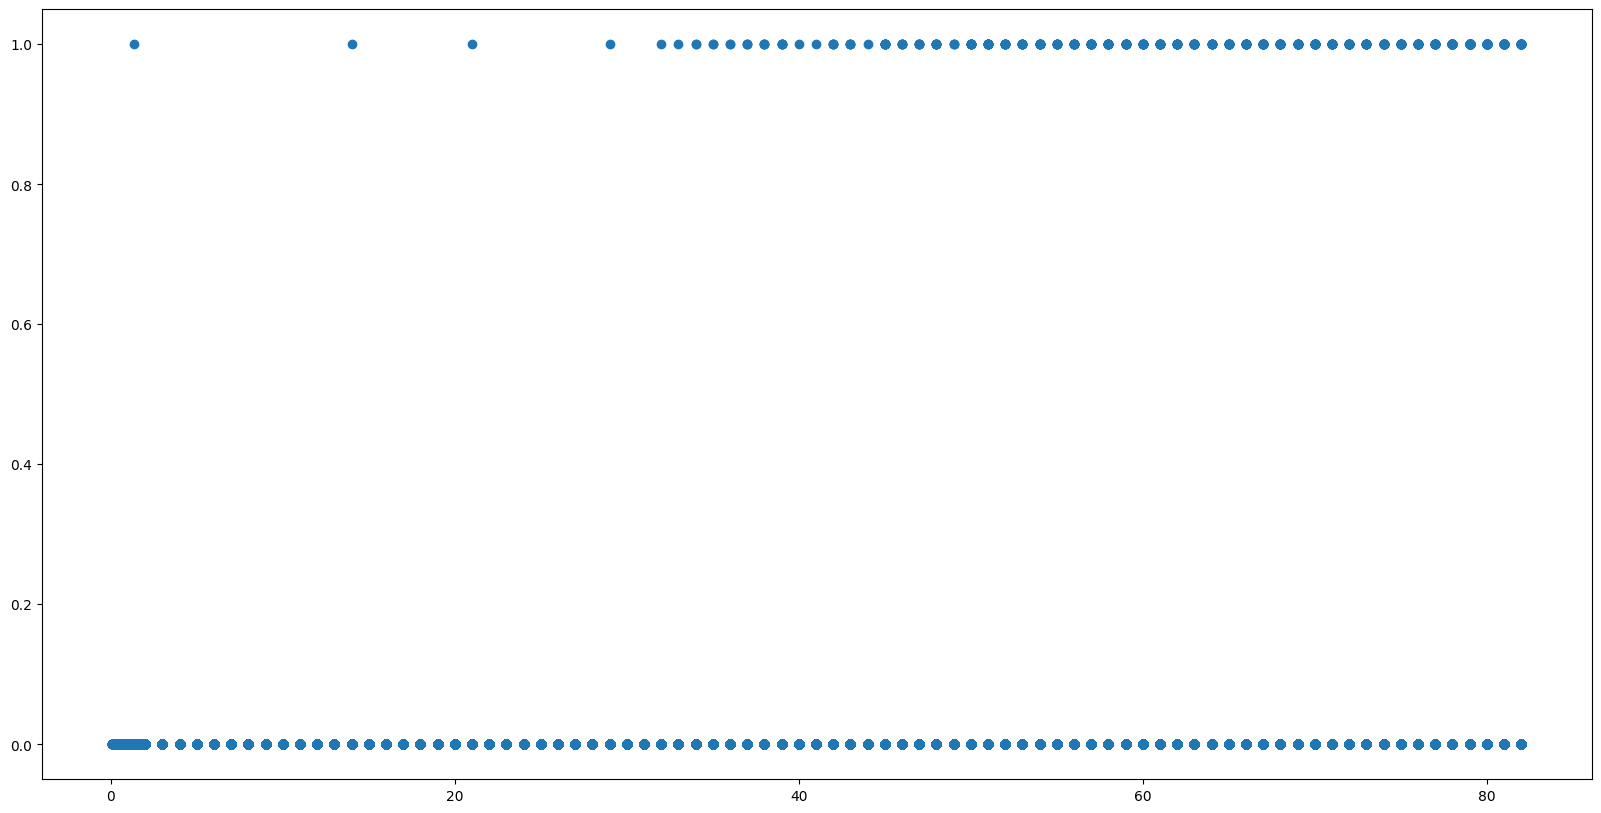

In [ ]:
plt.scatter(df3.age,df3.stroke)

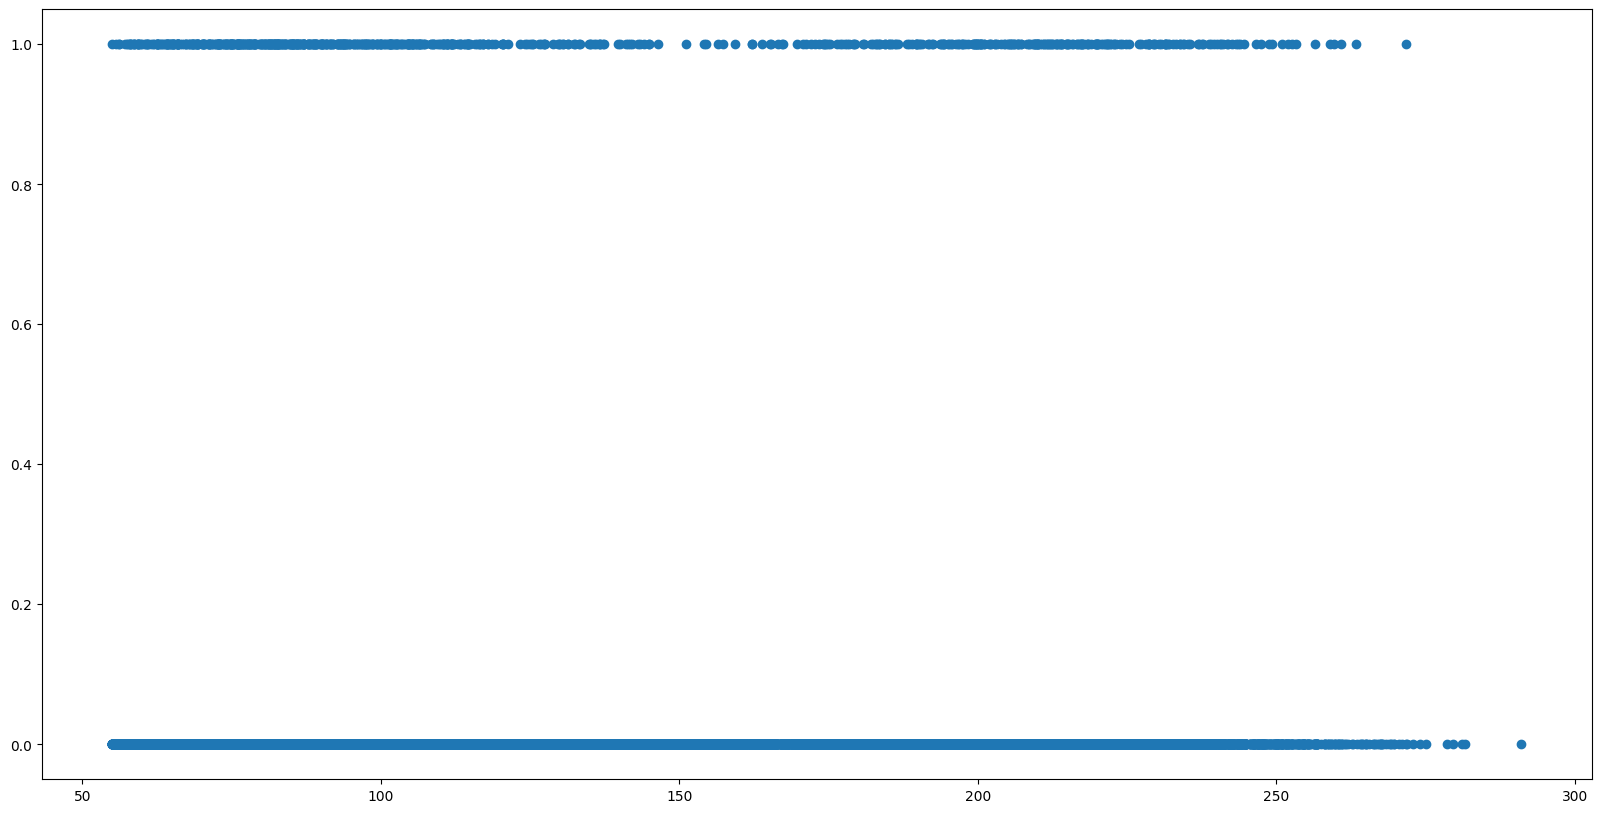

In [ ]:
plt.scatter(df3.avg_glucose_level,df3.stroke)

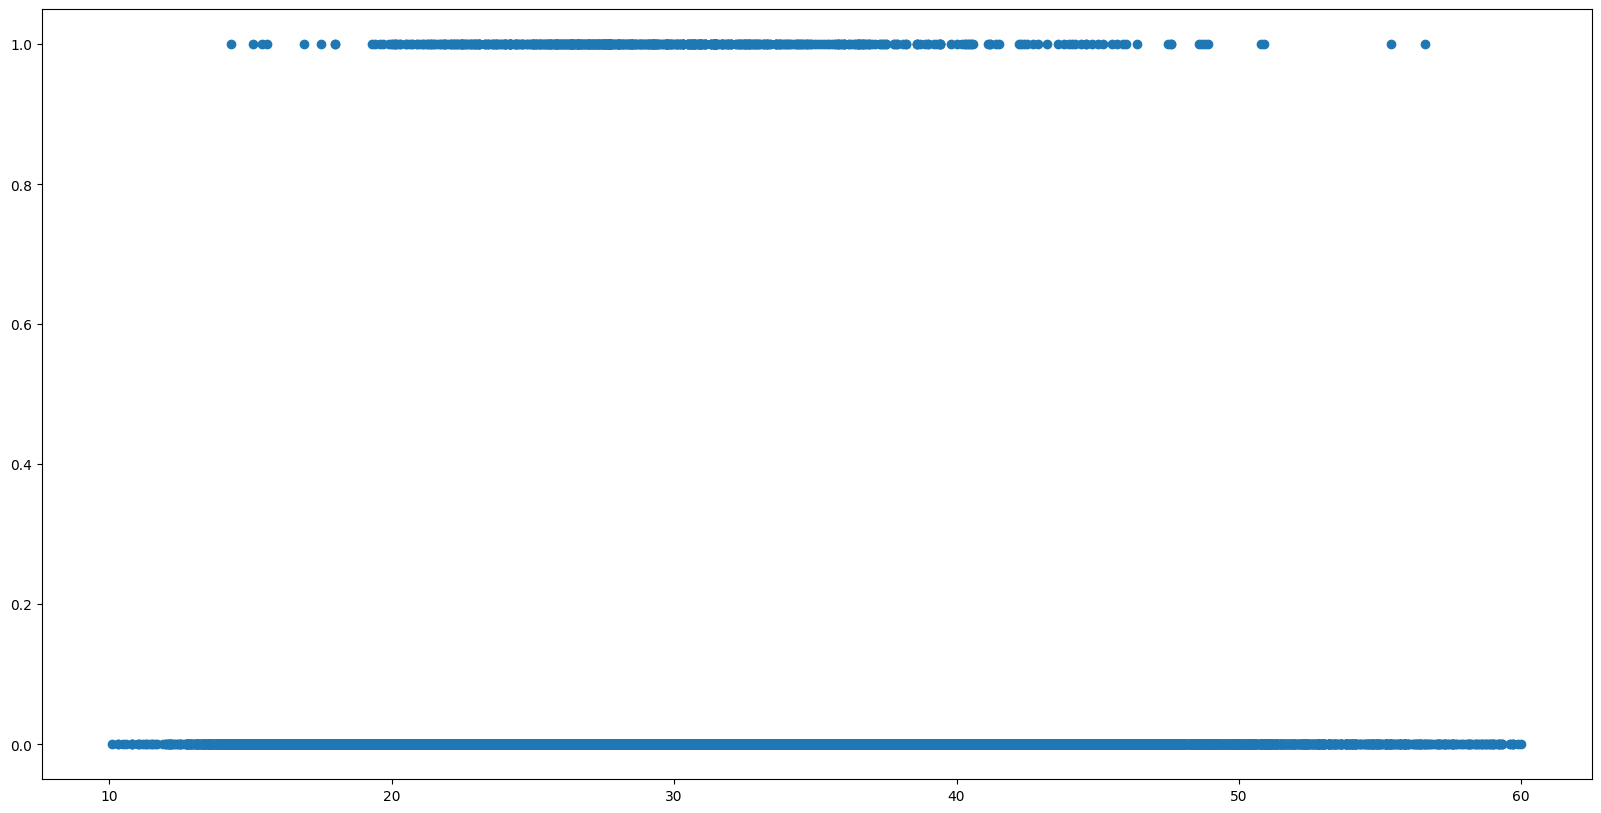

In [ ]:
plt.scatter(df3.bmi,df3.stroke)

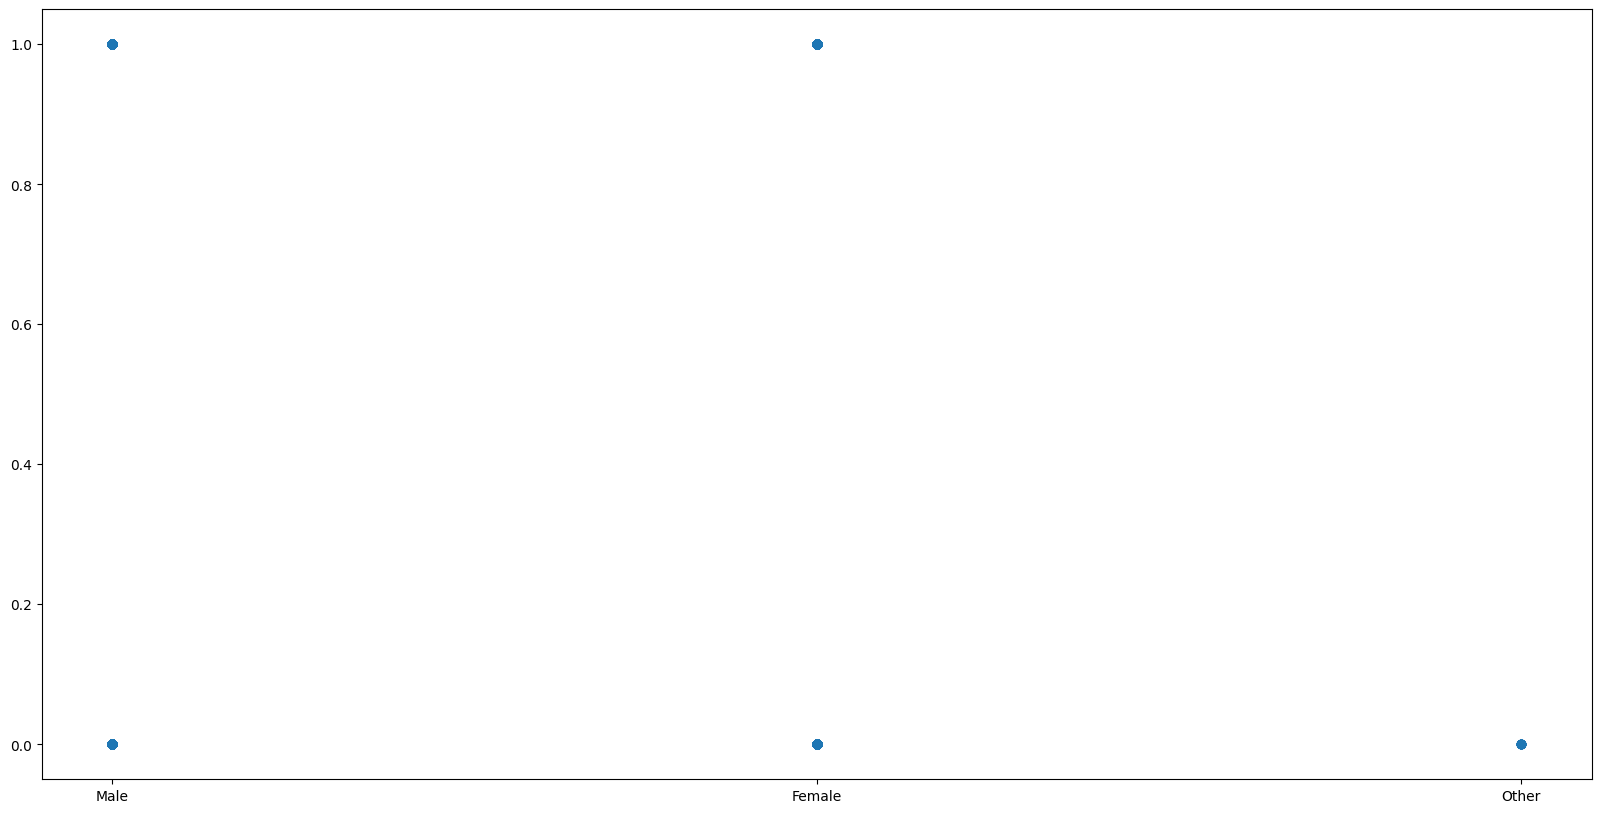

In [ ]:
plt.scatter(df3.gender,df3.stroke)

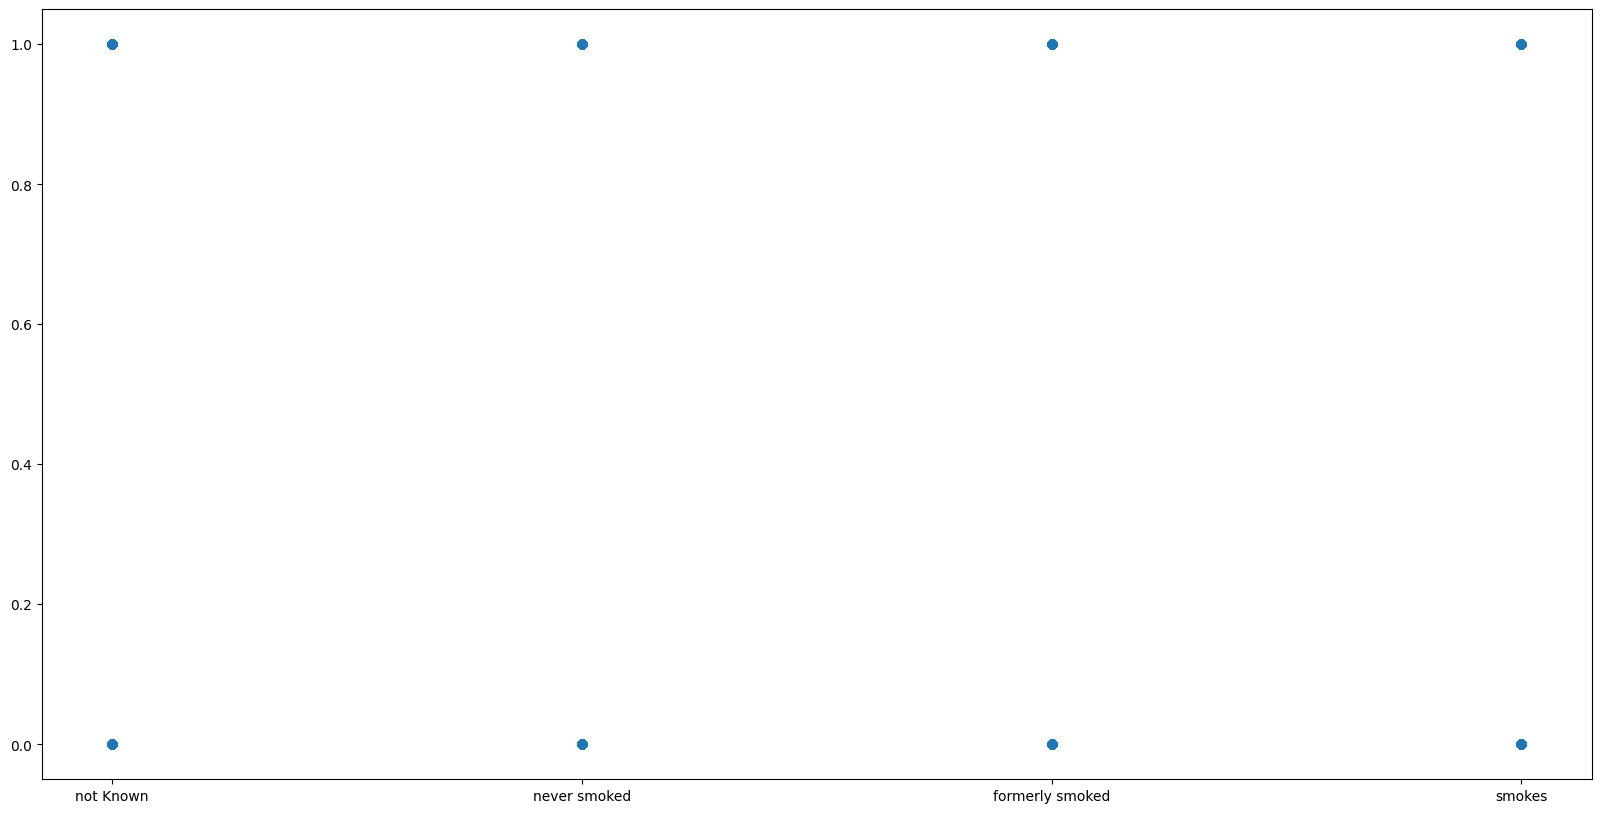

In [ ]:
plt.scatter(df3.smoking_status,df3.stroke)

In [ ]:
df3

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,95.12,18.0,not Known,0
1,Male,58.0,1,0,87.96,39.2,never smoked,0
2,Female,8.0,0,0,110.89,17.6,not Known,0
3,Female,70.0,0,0,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,161.28,19.1,not Known,0
...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,99.16,33.2,never smoked,0


In [ ]:
dummies=pd.get_dummies(df3.smoking_status)
dummies

,formerly smoked,never smoked,not Known,smokes
0,False,False,True,False
1,False,True,False,False
2,False,False,True,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
43395,False,True,False,False
43396,True,False,False,False
43397,True,False,False,False
43398,False,True,False,False


In [ ]:
dummies_numeric = dummies.astype(int)
dummies_numeric

,formerly smoked,never smoked,not Known,smokes
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
43395,0,1,0,0
43396,1,0,0,0
43397,1,0,0,0
43398,0,1,0,0


In [ ]:
df4=pd.concat([dummies_numeric,df3],axis='columns')
df4

,formerly smoked,never smoked,not Known,smokes,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,1,0,Male,3.0,0,0,95.12,18.0,not Known,0
1,0,1,0,0,Male,58.0,1,0,87.96,39.2,never smoked,0
2,0,0,1,0,Female,8.0,0,0,110.89,17.6,not Known,0
3,1,0,0,0,Female,70.0,0,0,69.04,35.9,formerly smoked,0
4,0,0,1,0,Male,14.0,0,0,161.28,19.1,not Known,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,1,0,0,Female,10.0,0,0,58.64,20.4,never smoked,0
43396,1,0,0,0,Female,56.0,0,0,213.61,55.4,formerly smoked,0
43397,1,0,0,0,Female,82.0,1,0,91.94,28.9,formerly smoked,0
43398,0,1,0,0,Male,40.0,0,0,99.16,33.2,never smoked,0


In [ ]:
df4=df4.drop(['smoking_status'],axis='columns')
df4

,formerly smoked,never smoked,not Known,smokes,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,0,1,0,Male,3.0,0,0,95.12,18.0,0
1,0,1,0,0,Male,58.0,1,0,87.96,39.2,0
2,0,0,1,0,Female,8.0,0,0,110.89,17.6,0
3,1,0,0,0,Female,70.0,0,0,69.04,35.9,0
4,0,0,1,0,Male,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,1,0,0,Female,10.0,0,0,58.64,20.4,0
43396,1,0,0,0,Female,56.0,0,0,213.61,55.4,0
43397,1,0,0,0,Female,82.0,1,0,91.94,28.9,0
43398,0,1,0,0,Male,40.0,0,0,99.16,33.2,0


In [ ]:
dummies1=pd.get_dummies(df4.gender)
dummies1

,Female,Male,Other
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,False,True,False
...,...,...,...
43395,True,False,False
43396,True,False,False
43397,True,False,False
43398,False,True,False


In [ ]:
dummies1_numeric = dummies1.astype(int)
dummies1_numeric

,Female,Male,Other
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
43395,1,0,0
43396,1,0,0
43397,1,0,0
43398,0,1,0


In [ ]:
df5=pd.concat([dummies1_numeric,df4],axis='columns')
df5

,Female,Male,Other,formerly smoked,never smoked,not Known,smokes,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,1,0,Male,3.0,0,0,95.12,18.0,0
1,0,1,0,0,1,0,0,Male,58.0,1,0,87.96,39.2,0
2,1,0,0,0,0,1,0,Female,8.0,0,0,110.89,17.6,0
3,1,0,0,1,0,0,0,Female,70.0,0,0,69.04,35.9,0
4,0,1,0,0,0,1,0,Male,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,1,0,0,0,1,0,0,Female,10.0,0,0,58.64,20.4,0
43396,1,0,0,1,0,0,0,Female,56.0,0,0,213.61,55.4,0
43397,1,0,0,1,0,0,0,Female,82.0,1,0,91.94,28.9,0
43398,0,1,0,0,1,0,0,Male,40.0,0,0,99.16,33.2,0


In [ ]:
df5=df5.drop(['gender'],axis='columns')
df5

,Female,Male,Other,formerly smoked,never smoked,not Known,smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,0,1,0,3.0,0,0,95.12,18.0,0
1,0,1,0,0,1,0,0,58.0,1,0,87.96,39.2,0
2,1,0,0,0,0,1,0,8.0,0,0,110.89,17.6,0
3,1,0,0,1,0,0,0,70.0,0,0,69.04,35.9,0
4,0,1,0,0,0,1,0,14.0,0,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,1,0,0,0,1,0,0,10.0,0,0,58.64,20.4,0
43396,1,0,0,1,0,0,0,56.0,0,0,213.61,55.4,0
43397,1,0,0,1,0,0,0,82.0,1,0,91.94,28.9,0
43398,0,1,0,0,1,0,0,40.0,0,0,99.16,33.2,0


In [ ]:
X=df5.drop(['stroke'],axis='columns')
X

,Female,Male,Other,formerly smoked,never smoked,not Known,smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0,1,0,0,0,1,0,3.0,0,0,95.12,18.0
1,0,1,0,0,1,0,0,58.0,1,0,87.96,39.2
2,1,0,0,0,0,1,0,8.0,0,0,110.89,17.6
3,1,0,0,1,0,0,0,70.0,0,0,69.04,35.9
4,0,1,0,0,0,1,0,14.0,0,0,161.28,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,1,0,0,0,1,0,0,10.0,0,0,58.64,20.4
43396,1,0,0,1,0,0,0,56.0,0,0,213.61,55.4
43397,1,0,0,1,0,0,0,82.0,1,0,91.94,28.9
43398,0,1,0,0,1,0,0,40.0,0,0,99.16,33.2


In [ ]:
y=df5.stroke

In [ ]:
df5.groupby('stroke')['stroke'].agg('count')

stroke
0    42528
1      783
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.score(X_test,y_test)

0.02964085050169607

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

c:\anaconda\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.9825695486552003

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dec.score(X_test,y_test)

0.9645619300473277

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=LogisticRegression()
RFC.fit(X_train,y_train)

c:\anaconda\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
RFC.score(X_test,y_test)

0.9825695486552003

In [ ]:
from sklearn.svm import SVC
SVM=SVC() 
SVM.fit(X_train,y_train)

SVC()

In [ ]:
SVM.score(X_test,y_test)


0.9825695486552003

In [ ]:
import numpy as np

def heart_stroke(smoking_status, gender, age, hypertension, heart_disease, avg_glucose_level, bmi):    
    try:
        loc_index = np.where(X.columns == smoking_status)[0][0]
    except IndexError:
        raise ValueError(f"'{smoking_status}' is not a valid column in X")
    
    try:
        gender_index = np.where(X.columns == gender)[0][0]
    except IndexError:
        raise ValueError(f"'{gender}' is not a valid column in X")
    
    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = hypertension
    x[2] = heart_disease
    x[3] = avg_glucose_level
    x[4] = bmi
    
    if loc_index >= 0:
        x[loc_index] = 1
    if gender_index >= 0:
        x[gender_index] = 1
    
    return SVM.predict([x])[0]


In [ ]:
heart_stroke('not Known','Male',20,0,1,100,40)

c:\anaconda\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0

In [ ]:
heart_stroke('smokes','Male',70,1,1,200,50)

c:\anaconda\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0

In [ ]:
import pickle
with open('heart_stroke_prediction_model.pickle','wb') as f:
    pickle.dump(SVM,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))